# What is the most optimal skill to learn for Data Analysts?
Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent


In [44]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from adjustText import adjust_text
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### 1. Find percent of postings with skill

In [45]:
# filter df
df_da = df[(df['job_title_short'] == 'Data Analyst')&(df['job_country']=='United States')].copy() # filter only data analysts
df_da = df_da.dropna(subset='salary_year_avg')
df_exploded = df_da.explode('job_skills') # explode the skill list
df_skills = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), # tuple with the grouping column and the aggregation function
    median_salary=('salary_year_avg', 'median') # tuple with the grouping column and the aggregation function
)
skills_stat = df_skills.sort_values(by='skill_count', ascending=False) # sorting by count

# get percentage of appearence for skill
job_count = len(df_da)
skills_stat['skill_ratio'] = 100*(skills_stat['skill_count'] / job_count)

# set variable to filter the df
skill_perc = 5
df_da_skills = skills_stat[skills_stat['skill_ratio'] > skill_perc]
df_da_skills

,skill_count,median_salary,skill_ratio
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### 2. Visualize median salary vs percent skill demand

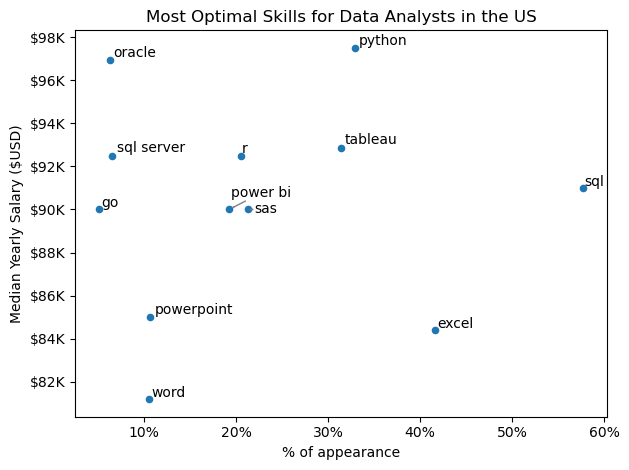

In [ ]:
from adjustText import adjust_text

df_da_skills.plot(
    kind='scatter',
    x='skill_ratio',
    y='median_salary',
    xlabel='% of appearance', 
    ylabel='Median Yearly Salary ($USD)',
    title='Most Optimal Skills for Data Analysts in the US', 
)
#adjust text
texts=[] #empty list to be filled with the loop
for i, txt in enumerate (df_da_skills.index): # i is the index and txt is the column
    texts.append(plt.text(df_da_skills['skill_ratio'].iloc[i], df_da_skills['median_salary'].iloc[i], txt)) # loop to append the empty list

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) 

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

### 3. Determine prevalent technologies

In [57]:
df['job_type_skills']

0                                                      None
1         {'analyst_tools': ['power bi', 'tableau'], 'pr...
2         {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3         {'cloud': ['aws'], 'libraries': ['tensorflow',...
4         {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
                                ...                        
785736    {'os': ['linux', 'unix'], 'other': ['kubernete...
785737    {'analyst_tools': ['sas', 'excel'], 'programmi...
785738           {'analyst_tools': ['powerpoint', 'excel']}
785739    {'cloud': ['aws', 'snowflake', 'azure', 'redsh...
785740                {'cloud': ['aws'], 'other': ['flow']}
Name: job_type_skills, Length: 785741, dtype: object

In [ ]:
df_technologies = df['job_type_skills'].copy()

# clean data
df_technologies = df_technologies.drop_duplicates()
df_technologies = df_technologies.dropna()

# combine all dictionaries into one
tech_dict = {}
for row in df_technologies:
    row_dict = ast.literal_eval(row) # convert string into dictionary 
    for key, value in row_dict.items(): 
        if key in tech_dict: # if key exists in tech_dict, add value to existing key
            tech_dict[key] += value
        else:                # if key does not exist, add both key and value
            tech_dict[key] = value

# remove duplicates and convert to list
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

tech_dict # now dictionary with lists of unique values for each key 


{'analyst_tools': ['outlook',
  'ssis',
  'sas',
  'microstrategy',
  'powerbi',
  'qlik',
  'tableau',
  'looker',
  'excel',
  'ms access',
  'datarobot',
  'dax',
  'ssrs',
  'power bi',
  'splunk',
  'sheets',
  'alteryx',
  'msaccess',
  'spss',
  'powerpoint',
  'sharepoint',
  'cognos',
  'esquisse',
  'sap',
  'spreadsheet',
  'nuix',
  'word',
  'visio'],
 'programming': ['shell',
  'lisp',
  'elixir',
  'visualbasic',
  'c++',
  'javascript',
  'sas',
  'vba',
  'swift',
  'julia',
  'typescript',
  'bash',
  't-sql',
  'go',
  'kotlin',
  'php',
  'css',
  'no-sql',
  'clojure',
  'ocaml',
  'matlab',
  'solidity',
  'vb.net',
  'groovy',
  'crystal',
  'python',
  'visual basic',
  'scala',
  'sql',
  'assembly',
  'cobol',
  'perl',
  'objective-c',
  'c#',
  'sass',
  'mongodb',
  'rust',
  'html',
  'haskell',
  'pascal',
  'mongo',
  'delphi',
  'ruby',
  'erlang',
  'c',
  'lua',
  'golang',
  'r',
  'powershell',
  'java',
  'apl',
  'nosql',
  'dart',
  'fortran',
  

In [83]:
# create dataframe out of the dictionary
df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])

# explode skills column
df_tech = df_tech.explode('skills')

# merge this df with the original one
df_plot = df_da_skills.merge(df_tech, left_on='job_skills', right_on='skills')
df_plot = df_plot.set_index('skills')
df_plot

,skill_count,median_salary,skill_ratio,technology
skills,,,,
sql,2508,91000.00,57.655172,programming
excel,1808,84392.00,41.563218,analyst_tools
python,1431,97500.00,32.896552,programming
tableau,1364,92875.00,31.356322,analyst_tools
sas,926,90000.00,21.287356,analyst_tools
sas,926,90000.00,21.287356,programming
r,893,92500.00,20.528736,programming
power bi,838,90000.00,19.264368,analyst_tools
powerpoint,462,85000.00,10.620690,analyst_tools


Finally plot the same scatter plot with technology insights

4 [0.50808419 0.54671396]
5 [ 0.75387857 -0.09278168]


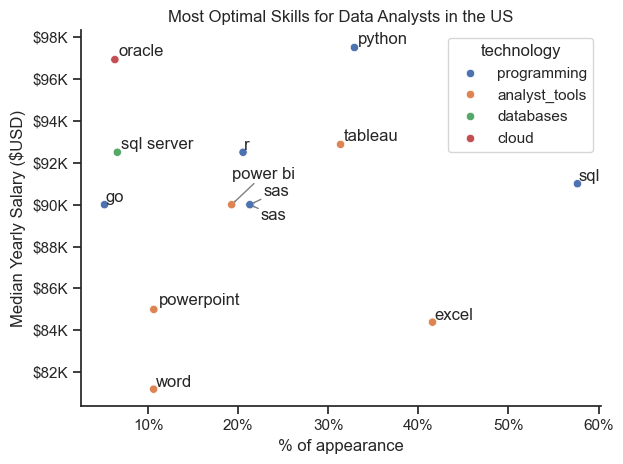

In [87]:
from adjustText import adjust_text

sns.scatterplot(
    data=df_plot, 
    x='skill_ratio',
    y='median_salary',
    hue='technology'
)

# add sns formatting
sns.despine()
sns.set_theme(style='ticks')

# adjust text in the plot
texts=[] # empty list to be filled with the loop
for i, txt in enumerate (df_plot.index): # i is the index and txt is the column
    texts.append(plt.text(df_plot['skill_ratio'].iloc[i], df_plot['median_salary'].iloc[i], txt)) # loop to append the empty list

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) 

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title('Most Optimal Skills for Data Analysts in the US')
plt.xlabel('% of appearance')
plt.ylabel('Median Yearly Salary ($USD)')

plt.tight_layout()
plt.show()